In [1]:
# Ekranı genişletmek için: 
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

C:\Users\Ali\AppData\Local\Temp\ipykernel_14748\2201182048.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Analiz için Veri Hazırlama


## Eksik Değerlerin İşlenmesi

In [5]:
## Silme

## Doldurma (mean, 0, mod, median)

### DROP NA

In [7]:
# Veri seti
df = pd.DataFrame({
    'ID': range(1, 11),
    'Maaş': [5000, 6200, np.nan, 4500, 7000, 4000, 5600, 4900, np.nan, 6100],
    'Kredi Borcu': [10000, np.nan,  8000, np.nan, 12000, 9500, np.nan, 11000, 10500, np.nan],
    'Eğitim Durumu': ['Lisans', np.nan, 'Yüksek Lisans', 'Lise', 'Doktora',
                      np.nan, 'Lisans', 'Yüksek Lisans', np.nan, 'Lise'],
    'Ev_Kira':['E',np.nan, np.nan, np.nan, np.nan, np.nan,'H', np.nan, np.nan, np.nan]
})

df

,ID,Maaş,Kredi Borcu,Eğitim Durumu,Ev_Kira
0,1,5000.0,10000.0,Lisans,E
1,2,6200.0,NaN,NaN,NaN
2,3,NaN,8000.0,Yüksek Lisans,NaN
3,4,4500.0,NaN,Lise,NaN
4,5,7000.0,12000.0,Doktora,NaN
5,6,4000.0,9500.0,NaN,NaN
6,7,5600.0,NaN,Lisans,H
7,8,4900.0,11000.0,Yüksek Lisans,NaN
8,9,NaN,10500.0,NaN,NaN
9,10,6100.0,NaN,Lise,NaN


In [8]:
df_any = df.dropna(axis=0, how='any')
df_any

,ID,Maaş,Kredi Borcu,Eğitim Durumu,Ev_Kira
0,1,5000.0,10000.0,Lisans,E


In [9]:
df_any = df.dropna(axis=0, how='all')
df_any

,ID,Maaş,Kredi Borcu,Eğitim Durumu,Ev_Kira
0,1,5000.0,10000.0,Lisans,E
1,2,6200.0,NaN,NaN,NaN
2,3,NaN,8000.0,Yüksek Lisans,NaN
3,4,4500.0,NaN,Lise,NaN
4,5,7000.0,12000.0,Doktora,NaN
5,6,4000.0,9500.0,NaN,NaN
6,7,5600.0,NaN,Lisans,H
7,8,4900.0,11000.0,Yüksek Lisans,NaN
8,9,NaN,10500.0,NaN,NaN
9,10,6100.0,NaN,Lise,NaN


In [10]:
df_any = df.dropna(axis=0, thresh=3)
df_any
## Thresh : silinmemesi için gerekli en az dolu sutun sayısı

,ID,Maaş,Kredi Borcu,Eğitim Durumu,Ev_Kira
0,1,5000.0,10000.0,Lisans,E
2,3,NaN,8000.0,Yüksek Lisans,NaN
3,4,4500.0,NaN,Lise,NaN
4,5,7000.0,12000.0,Doktora,NaN
5,6,4000.0,9500.0,NaN,NaN
6,7,5600.0,NaN,Lisans,H
7,8,4900.0,11000.0,Yüksek Lisans,NaN
9,10,6100.0,NaN,Lise,NaN


In [11]:
## Subset kolonlara göre drop
df_subset = df.dropna(subset=['Maaş','Kredi Borcu'], thresh=2)
df_subset

,ID,Maaş,Kredi Borcu,Eğitim Durumu,Ev_Kira
0,1,5000.0,10000.0,Lisans,E
4,5,7000.0,12000.0,Doktora,NaN
5,6,4000.0,9500.0,NaN,NaN
7,8,4900.0,11000.0,Yüksek Lisans,NaN


In [12]:
## Inplace: df'de değişiklik yapar
df_copy = df.copy()
df_copy

,ID,Maaş,Kredi Borcu,Eğitim Durumu,Ev_Kira
0,1,5000.0,10000.0,Lisans,E
1,2,6200.0,NaN,NaN,NaN
2,3,NaN,8000.0,Yüksek Lisans,NaN
3,4,4500.0,NaN,Lise,NaN
4,5,7000.0,12000.0,Doktora,NaN
5,6,4000.0,9500.0,NaN,NaN
6,7,5600.0,NaN,Lisans,H
7,8,4900.0,11000.0,Yüksek Lisans,NaN
8,9,NaN,10500.0,NaN,NaN
9,10,6100.0,NaN,Lise,NaN


In [13]:
df_copy.dropna(thresh=3, inplace=True)

In [14]:
df_copy

,ID,Maaş,Kredi Borcu,Eğitim Durumu,Ev_Kira
0,1,5000.0,10000.0,Lisans,E
2,3,NaN,8000.0,Yüksek Lisans,NaN
3,4,4500.0,NaN,Lise,NaN
4,5,7000.0,12000.0,Doktora,NaN
5,6,4000.0,9500.0,NaN,NaN
6,7,5600.0,NaN,Lisans,H
7,8,4900.0,11000.0,Yüksek Lisans,NaN
9,10,6100.0,NaN,Lise,NaN


In [15]:
df_copy = df.copy()
df_copy.dropna(thresh=3, inplace=False)
df_copy

,ID,Maaş,Kredi Borcu,Eğitim Durumu,Ev_Kira
0,1,5000.0,10000.0,Lisans,E
1,2,6200.0,NaN,NaN,NaN
2,3,NaN,8000.0,Yüksek Lisans,NaN
3,4,4500.0,NaN,Lise,NaN
4,5,7000.0,12000.0,Doktora,NaN
5,6,4000.0,9500.0,NaN,NaN
6,7,5600.0,NaN,Lisans,H
7,8,4900.0,11000.0,Yüksek Lisans,NaN
8,9,NaN,10500.0,NaN,NaN
9,10,6100.0,NaN,Lise,NaN


In [16]:
## Drop Columns
df_thresh= df.dropna(axis=1, thresh=6)
df_thresh

,ID,Maaş,Kredi Borcu,Eğitim Durumu
0,1,5000.0,10000.0,Lisans
1,2,6200.0,NaN,NaN
2,3,NaN,8000.0,Yüksek Lisans
3,4,4500.0,NaN,Lise
4,5,7000.0,12000.0,Doktora
5,6,4000.0,9500.0,NaN
6,7,5600.0,NaN,Lisans
7,8,4900.0,11000.0,Yüksek Lisans
8,9,NaN,10500.0,NaN
9,10,6100.0,NaN,Lise


In [17]:
df_thresh= df

min_fill_ratio = 0.59
min_required = int(min_fill_ratio * len(df_thresh))  # örneğin 0.7 * 10 = 7

# threshold kullanarak sütunları sil
df_cleaned = df_thresh.dropna(axis=1, thresh=min_required)
df_cleaned

,ID,Maaş,Kredi Borcu,Eğitim Durumu
0,1,5000.0,10000.0,Lisans
1,2,6200.0,NaN,NaN
2,3,NaN,8000.0,Yüksek Lisans
3,4,4500.0,NaN,Lise
4,5,7000.0,12000.0,Doktora
5,6,4000.0,9500.0,NaN
6,7,5600.0,NaN,Lisans
7,8,4900.0,11000.0,Yüksek Lisans
8,9,NaN,10500.0,NaN
9,10,6100.0,NaN,Lise


### Fill NA

In [19]:
df1 = df
df1

,ID,Maaş,Kredi Borcu,Eğitim Durumu,Ev_Kira
0,1,5000.0,10000.0,Lisans,E
1,2,6200.0,NaN,NaN,NaN
2,3,NaN,8000.0,Yüksek Lisans,NaN
3,4,4500.0,NaN,Lise,NaN
4,5,7000.0,12000.0,Doktora,NaN
5,6,4000.0,9500.0,NaN,NaN
6,7,5600.0,NaN,Lisans,H
7,8,4900.0,11000.0,Yüksek Lisans,NaN
8,9,NaN,10500.0,NaN,NaN
9,10,6100.0,NaN,Lise,NaN


In [20]:
## median
df1['Maaş']=df1['Maaş'].fillna(df1['Maaş'].median())

In [21]:
medi= df1['Maaş'].median()
df1['Maaş']=df1['Maaş'].fillna(medi)

In [22]:
df1

,ID,Maaş,Kredi Borcu,Eğitim Durumu,Ev_Kira
0,1,5000.0,10000.0,Lisans,E
1,2,6200.0,NaN,NaN,NaN
2,3,5300.0,8000.0,Yüksek Lisans,NaN
3,4,4500.0,NaN,Lise,NaN
4,5,7000.0,12000.0,Doktora,NaN
5,6,4000.0,9500.0,NaN,NaN
6,7,5600.0,NaN,Lisans,H
7,8,4900.0,11000.0,Yüksek Lisans,NaN
8,9,5300.0,10500.0,NaN,NaN
9,10,6100.0,NaN,Lise,NaN


In [23]:
# mean
df2 = df.copy()
df2['Kredi Borcu'] = df2['Kredi Borcu'].fillna(df2['Kredi Borcu'].mean())
df2

,ID,Maaş,Kredi Borcu,Eğitim Durumu,Ev_Kira
0,1,5000.0,10000.000000,Lisans,E
1,2,6200.0,10166.666667,NaN,NaN
2,3,5300.0,8000.000000,Yüksek Lisans,NaN
3,4,4500.0,10166.666667,Lise,NaN
4,5,7000.0,12000.000000,Doktora,NaN
5,6,4000.0,9500.000000,NaN,NaN
6,7,5600.0,10166.666667,Lisans,H
7,8,4900.0,11000.000000,Yüksek Lisans,NaN
8,9,5300.0,10500.000000,NaN,NaN
9,10,6100.0,10166.666667,Lise,NaN


In [24]:
## mode
df2 = df.copy()
df2_mode= df2['Eğitim Durumu'].mode()
df2['Eğitim Durumu'] = df2['Eğitim Durumu'].fillna(df2_mode)
df2

,ID,Maaş,Kredi Borcu,Eğitim Durumu,Ev_Kira
0,1,5000.0,10000.0,Lisans,E
1,2,6200.0,NaN,Lise,NaN
2,3,5300.0,8000.0,Yüksek Lisans,NaN
3,4,4500.0,NaN,Lise,NaN
4,5,7000.0,12000.0,Doktora,NaN
5,6,4000.0,9500.0,NaN,NaN
6,7,5600.0,NaN,Lisans,H
7,8,4900.0,11000.0,Yüksek Lisans,NaN
8,9,5300.0,10500.0,NaN,NaN
9,10,6100.0,NaN,Lise,NaN


In [25]:
df

,ID,Maaş,Kredi Borcu,Eğitim Durumu,Ev_Kira
0,1,5000.0,10000.0,Lisans,E
1,2,6200.0,NaN,NaN,NaN
2,3,5300.0,8000.0,Yüksek Lisans,NaN
3,4,4500.0,NaN,Lise,NaN
4,5,7000.0,12000.0,Doktora,NaN
5,6,4000.0,9500.0,NaN,NaN
6,7,5600.0,NaN,Lisans,H
7,8,4900.0,11000.0,Yüksek Lisans,NaN
8,9,5300.0,10500.0,NaN,NaN
9,10,6100.0,NaN,Lise,NaN


In [26]:
df3 = df.copy()
df3['Eğitim Durumu'] = df3['Eğitim Durumu'].fillna(method='ffill')
df3

,ID,Maaş,Kredi Borcu,Eğitim Durumu,Ev_Kira
0,1,5000.0,10000.0,Lisans,E
1,2,6200.0,NaN,Lisans,NaN
2,3,5300.0,8000.0,Yüksek Lisans,NaN
3,4,4500.0,NaN,Lise,NaN
4,5,7000.0,12000.0,Doktora,NaN
5,6,4000.0,9500.0,Doktora,NaN
6,7,5600.0,NaN,Lisans,H
7,8,4900.0,11000.0,Yüksek Lisans,NaN
8,9,5300.0,10500.0,Yüksek Lisans,NaN
9,10,6100.0,NaN,Lise,NaN


In [27]:
df3 = df.copy()
df3['Eğitim Durumu'] = df3['Eğitim Durumu'].fillna(method='bfill')
df3

,ID,Maaş,Kredi Borcu,Eğitim Durumu,Ev_Kira
0,1,5000.0,10000.0,Lisans,E
1,2,6200.0,NaN,Yüksek Lisans,NaN
2,3,5300.0,8000.0,Yüksek Lisans,NaN
3,4,4500.0,NaN,Lise,NaN
4,5,7000.0,12000.0,Doktora,NaN
5,6,4000.0,9500.0,Lisans,NaN
6,7,5600.0,NaN,Lisans,H
7,8,4900.0,11000.0,Yüksek Lisans,NaN
8,9,5300.0,10500.0,Lise,NaN
9,10,6100.0,NaN,Lise,NaN


In [28]:
df5 = df.copy()
df5.fillna(value={
    'Maaş': df5['Maaş'].median(),
    'Kredi Borcu': df5['Kredi Borcu'].mean(),
    'Eğitim Durumu': 'Bilinmiyor',
    'Ev_Kira': 'E'  # Ev sahibi/kiracı bilgisi eksikse 'E' varsayalım
}, inplace=True)
df5

,ID,Maaş,Kredi Borcu,Eğitim Durumu,Ev_Kira
0,1,5000.0,10000.000000,Lisans,E
1,2,6200.0,10166.666667,Bilinmiyor,E
2,3,5300.0,8000.000000,Yüksek Lisans,E
3,4,4500.0,10166.666667,Lise,E
4,5,7000.0,12000.000000,Doktora,E
5,6,4000.0,9500.000000,Bilinmiyor,E
6,7,5600.0,10166.666667,Lisans,H
7,8,4900.0,11000.000000,Yüksek Lisans,E
8,9,5300.0,10500.000000,Bilinmiyor,E
9,10,6100.0,10166.666667,Lise,E


### DROP

In [30]:
df1 = df.drop(labels=[2], axis=0)  # index 2'yi sil
df1

,ID,Maaş,Kredi Borcu,Eğitim Durumu,Ev_Kira
0,1,5000.0,10000.0,Lisans,E
1,2,6200.0,NaN,NaN,NaN
3,4,4500.0,NaN,Lise,NaN
4,5,7000.0,12000.0,Doktora,NaN
5,6,4000.0,9500.0,NaN,NaN
6,7,5600.0,NaN,Lisans,H
7,8,4900.0,11000.0,Yüksek Lisans,NaN
8,9,5300.0,10500.0,NaN,NaN
9,10,6100.0,NaN,Lise,NaN


In [31]:
df2 = df.drop(labels=['Maaş'], axis=1)
df2

,ID,Kredi Borcu,Eğitim Durumu,Ev_Kira
0,1,10000.0,Lisans,E
1,2,NaN,NaN,NaN
2,3,8000.0,Yüksek Lisans,NaN
3,4,NaN,Lise,NaN
4,5,12000.0,Doktora,NaN
5,6,9500.0,NaN,NaN
6,7,NaN,Lisans,H
7,8,11000.0,Yüksek Lisans,NaN
8,9,10500.0,NaN,NaN
9,10,NaN,Lise,NaN


In [32]:
df4 = df.drop(columns=['Yaş'])  # hata vermez, atlar
df4

KeyError: "['Yaş'] not found in axis"

In [73]:
df4 = df.drop(columns=['Yaş'], errors='ignore')  # hata vermez, atlar
df4

,ID,Maaş,Kredi Borcu,Eğitim Durumu,Ev_Kira
0,1,5000.0,10000.0,Lisans,E
1,2,6200.0,NaN,NaN,NaN
2,3,5300.0,8000.0,Yüksek Lisans,NaN
3,4,4500.0,NaN,Lise,NaN
4,5,7000.0,12000.0,Doktora,NaN
5,6,4000.0,9500.0,NaN,NaN
6,7,5600.0,NaN,Lisans,H
7,8,4900.0,11000.0,Yüksek Lisans,NaN
8,9,5300.0,10500.0,NaN,NaN
9,10,6100.0,NaN,Lise,NaN


In [75]:
## hEM SATIR HEM SUTUN SİLME
df5 = df.drop(index=1, columns='Ev_Kira', errors='ignore')  # hem satır hem sütun siler
df5

,ID,Maaş,Kredi Borcu,Eğitim Durumu
0,1,5000.0,10000.0,Lisans
2,3,5300.0,8000.0,Yüksek Lisans
3,4,4500.0,NaN,Lise
4,5,7000.0,12000.0,Doktora
5,6,4000.0,9500.0,NaN
6,7,5600.0,NaN,Lisans
7,8,4900.0,11000.0,Yüksek Lisans
8,9,5300.0,10500.0,NaN
9,10,6100.0,NaN,Lise


### Drop Duplicates

In [78]:
df = df.drop_duplicates(subset=None, keep='first', inplace=False)
df

,ID,Maaş,Kredi Borcu,Eğitim Durumu,Ev_Kira
0,1,5000.0,10000.0,Lisans,E
1,2,6200.0,NaN,NaN,NaN
2,3,5300.0,8000.0,Yüksek Lisans,NaN
3,4,4500.0,NaN,Lise,NaN
4,5,7000.0,12000.0,Doktora,NaN
5,6,4000.0,9500.0,NaN,NaN
6,7,5600.0,NaN,Lisans,H
7,8,4900.0,11000.0,Yüksek Lisans,NaN
8,9,5300.0,10500.0,NaN,NaN
9,10,6100.0,NaN,Lise,NaN


### Replace

In [81]:
import pandas as pd

students_df = pd.DataFrame({
    'İsimler': ['Melike', 'Baris', 'Almila', 'Amir', 'Ceyda'],
    'Bölüm': ['Math', 'Fisics', 'Biology', 'Math', 'Fisics'],
    'Not Ortalaması': ['A', 'A', 'B', 'C', 'B']
})

students_df.replace({
    'A': '90-100',
    'B': '85-89',
    'C': '75-84',
    'D': '65-74',
    'E': '60-64'
}, inplace=True)

print(students_df)

  İsimler    Bölüm Not Ortalaması
0  Melike     Math         90-100
1   Baris   Fisics         90-100
2  Almila  Biology          85-89
3    Amir     Math          75-84
4   Ceyda   Fisics          85-89


In [83]:
students_df.replace(to_replace='Fisics',
                    value='Physics', 
                    inplace=True)
print(students_df)

  İsimler    Bölüm Not Ortalaması
0  Melike     Math         90-100
1   Baris  Physics         90-100
2  Almila  Biology          85-89
3    Amir     Math          75-84
4   Ceyda  Physics          85-89


### Type Convert

In [86]:

students_data = {
  'İsimler': ['Melike', 'Baris', 'Almila'],
  'Yaş': [21.0, 22.0, 20.0],# float olarak yaş
  'Bölüm': ['Math', 'Physics', 'Biology']
}

students_df = pd.DataFrame(students_data)
students_df

,İsimler,Yaş,Bölüm
0,Melike,21.0,Math
1,Baris,22.0,Physics
2,Almila,20.0,Biology


In [88]:
students_df.dtypes

İsimler     object
Yaş        float64
Bölüm       object
dtype: object

In [90]:
students_df['Yaş'] = students_df['Yaş'].astype(int)

In [92]:
students_df

,İsimler,Yaş,Bölüm
0,Melike,21,Math
1,Baris,22,Physics
2,Almila,20,Biology


In [94]:
# Bölümleri küçük harfe dönüştürme
students_df['Bölüm'] = students_df['Bölüm'].str.lower()

# İsimleri büyük harfle başlatma
students_df['İsimler'] = students_df['İsimler'].str.upper()

print(students_df)

  İsimler  Yaş    Bölüm
0  MELIKE   21     math
1   BARIS   22  physics
2  ALMILA   20  biology


## DATETIME

In [97]:
date = pd.Timestamp("2024-05-10")
date

Timestamp('2024-05-10 00:00:00')

In [99]:
timeseries = pd.DatetimeIndex(['2021-08-01', '2021-08-01', '2021-08-02', '2021-08-02', '2021-08-03', '2021-08-01'])
print(timeseries)

DatetimeIndex(['2021-08-01', '2021-08-01', '2021-08-02', '2021-08-02',
               '2021-08-03', '2021-08-01'],
              dtype='datetime64[ns]', freq=None)


In [101]:
timeseries

DatetimeIndex(['2021-08-01', '2021-08-01', '2021-08-02', '2021-08-02',
               '2021-08-03', '2021-08-01'],
              dtype='datetime64[ns]', freq=None)

In [103]:
## DATE Range
pd.date_range("2023-01-01", periods=5, freq="M")

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31'],
              dtype='datetime64[ns]', freq='M')

In [105]:
## DATE Range
pd.date_range("2023-01-01", periods=5, freq="D")

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05'],
              dtype='datetime64[ns]', freq='D')

In [107]:
import pandas as pd

students_df = pd.DataFrame({
    'İsimler': ['Melike', 'Baris', 'Almila', 'Amir', 'Ceyda'],
    'Bölüm': ['Math', 'Physics', 'Biology', 'Math', 'Physics'],
    'Eğitimin Başlangıcı': ['2019-09-01', '2018-03-01', '2020-03-01', '2019-03-01', '2017-09-01']
})

print(students_df)

  İsimler    Bölüm Eğitimin Başlangıcı
0  Melike     Math          2019-09-01
1   Baris  Physics          2018-03-01
2  Almila  Biology          2020-03-01
3    Amir     Math          2019-03-01
4   Ceyda  Physics          2017-09-01


In [109]:
students_df['Eğitimin Başlangıcı'] = pd.to_datetime(students_df['Eğitimin Başlangıcı'])

In [111]:
students_df

,İsimler,Bölüm,Eğitimin Başlangıcı
0,Melike,Math,2019-09-01
1,Baris,Physics,2018-03-01
2,Almila,Biology,2020-03-01
3,Amir,Math,2019-03-01
4,Ceyda,Physics,2017-09-01


In [113]:
from datetime import timedelta

# Eğitim başlangıcına, 3 yıl, 6 aya (3.50 yıl) eşdeğer gün sayısını ekliyoruz
students_df['Eğitimin Bitişi'] = students_df['Eğitimin Başlangıcı'] + timedelta(days=round(3.50*365))

In [115]:
students_df

,İsimler,Bölüm,Eğitimin Başlangıcı,Eğitimin Bitişi
0,Melike,Math,2019-09-01,2023-03-02
1,Baris,Physics,2018-03-01,2021-08-30
2,Almila,Biology,2020-03-01,2023-08-31
3,Amir,Math,2019-03-01,2022-08-30
4,Ceyda,Physics,2017-09-01,2021-03-02


In [117]:
# Örnek tarih verisi
df = pd.DataFrame({
    'Tarih': pd.to_datetime([
        '2023-01-10', '2023-01-15', '2023-02-05', '2023-02-20', '2023-03-01'
    ])
})

In [119]:
## Extract
df['Yil']=df['Tarih'].dt.year
df['Month']=df['Tarih'].dt.month
df['Day']=df['Tarih'].dt.day
df

,Tarih,Yil,Month,Day
0,2023-01-10,2023,1,10
1,2023-01-15,2023,1,15
2,2023-02-05,2023,2,5
3,2023-02-20,2023,2,20
4,2023-03-01,2023,3,1


In [121]:
df['Tarih2'] = pd.to_datetime(['2025-01-20', '2023-01-25', '2023-02-15', '2023-03-05', '2023-03-10'])

In [123]:
df

,Tarih,Yil,Month,Day,Tarih2
0,2023-01-10,2023,1,10,2025-01-20
1,2023-01-15,2023,1,15,2023-01-25
2,2023-02-05,2023,2,5,2023-02-15
3,2023-02-20,2023,2,20,2023-03-05
4,2023-03-01,2023,3,1,2023-03-10


In [125]:
## Date Diff
df['day_diff'] = (df['Tarih2'] - df['Tarih']).dt.days
df

,Tarih,Yil,Month,Day,Tarih2,day_diff
0,2023-01-10,2023,1,10,2025-01-20,741
1,2023-01-15,2023,1,15,2023-01-25,10
2,2023-02-05,2023,2,5,2023-02-15,10
3,2023-02-20,2023,2,20,2023-03-05,13
4,2023-03-01,2023,3,1,2023-03-10,9


In [127]:
df['day_diff_today'] = (pd.Timestamp.today() - df['Tarih']).dt.days
df

,Tarih,Yil,Month,Day,Tarih2,day_diff,day_diff_today
0,2023-01-10,2023,1,10,2025-01-20,741,889
1,2023-01-15,2023,1,15,2023-01-25,10,884
2,2023-02-05,2023,2,5,2023-02-15,10,863
3,2023-02-20,2023,2,20,2023-03-05,13,848
4,2023-03-01,2023,3,1,2023-03-10,9,839


In [129]:
df['Ay Farkı 2'] = (df['Tarih2'].dt.year - df['Tarih'].dt.year) * 12 + \
                   (df['Tarih2'].dt.month - df['Tarih'].dt.month)

In [131]:
df

,Tarih,Yil,Month,Day,Tarih2,day_diff,day_diff_today,Ay Farkı 2
0,2023-01-10,2023,1,10,2025-01-20,741,889,24
1,2023-01-15,2023,1,15,2023-01-25,10,884,0
2,2023-02-05,2023,2,5,2023-02-15,10,863,0
3,2023-02-20,2023,2,20,2023-03-05,13,848,1
4,2023-03-01,2023,3,1,2023-03-10,9,839,0


## CONCAT MERGE JOIN

### CONCAT

In [135]:
## CONCAT ~~ UNION


students1 = pd.DataFrame({'İsimler': ['Melike', 'Baris', 'Almila', 'Emir', 'Ceyda'],
                          'Bölüm': ['Math', 'Physics', 'Biology', 'Math', 'Physics'],
                          'Gruplar': ['M19', 'P18', 'B20', 'M19', 'P17']},
                         index=['am19', 'bp18', 'ob20', 'im19', 'kp17']
)

students1

,İsimler,Bölüm,Gruplar
am19,Melike,Math,M19
bp18,Baris,Physics,P18
ob20,Almila,Biology,B20
im19,Emir,Math,M19
kp17,Ceyda,Physics,P17


In [137]:
students2 = pd.DataFrame({'İsimler': ['Ege', 'İpek', 'Mahlika', 'Serkan',],
                          'Bölüm': ['History', 'Math', 'Computer Science', 'Computer Science'],
                          'Gruplar': ['H19', 'M18', 'CS20', 'CS19'],
                          'Not Ortalaması': [98, 72, 81, 78]},
                         index=['eh19', 'im18', 'mcs20', 'scs19']
)

students2

,İsimler,Bölüm,Gruplar,Not Ortalaması
eh19,Ege,History,H19,98
im18,İpek,Math,M18,72
mcs20,Mahlika,Computer Science,CS20,81
scs19,Serkan,Computer Science,CS19,78


In [139]:
students_concat =pd.concat([students1, students2])
students_concat

,İsimler,Bölüm,Gruplar,Not Ortalaması
am19,Melike,Math,M19,NaN
bp18,Baris,Physics,P18,NaN
ob20,Almila,Biology,B20,NaN
im19,Emir,Math,M19,NaN
kp17,Ceyda,Physics,P17,NaN
eh19,Ege,History,H19,98.0
im18,İpek,Math,M18,72.0
mcs20,Mahlika,Computer Science,CS20,81.0
scs19,Serkan,Computer Science,CS19,78.0


In [141]:
students_concat =pd.concat([students1, students2,students2 ])
students_concat

,İsimler,Bölüm,Gruplar,Not Ortalaması
am19,Melike,Math,M19,NaN
bp18,Baris,Physics,P18,NaN
ob20,Almila,Biology,B20,NaN
im19,Emir,Math,M19,NaN
kp17,Ceyda,Physics,P17,NaN
eh19,Ege,History,H19,98.0
im18,İpek,Math,M18,72.0
mcs20,Mahlika,Computer Science,CS20,81.0
scs19,Serkan,Computer Science,CS19,78.0
eh19,Ege,History,H19,98.0


In [143]:
students_concat =pd.concat([students1, students2], join='inner')
students_concat

,İsimler,Bölüm,Gruplar
am19,Melike,Math,M19
bp18,Baris,Physics,P18
ob20,Almila,Biology,B20
im19,Emir,Math,M19
kp17,Ceyda,Physics,P17
eh19,Ege,History,H19
im18,İpek,Math,M18
mcs20,Mahlika,Computer Science,CS20
scs19,Serkan,Computer Science,CS19


### MERGE

In [146]:
## Merge ~~ Join

students = pd.DataFrame({'İsimler': ['Melike', 'Baris', 'Almila', 'Emir', 'Ceyda'],
                          'Bölüm': ['Math', 'Physics', 'Biology', 'Math', 'Physics'],
                          'Gruplar': ['M19', 'P18', 'B20', 'M19', 'P17']},
                         index=['am19', 'bp18', 'ob20', 'im19', 'kp17']
)

In [148]:
grades = pd.DataFrame({'İsimler': ['Melike', 'Almila', 'Emir', 'Ceyda'],
                       'Fizik': [99, None, None, 87],
                       'Matematik': [78, 68, 91, 89],
                       'Biyoloji': [None, 87, None, None],
                       'Kimya': [None, 73, None, None]})

In [150]:
students

,İsimler,Bölüm,Gruplar
am19,Melike,Math,M19
bp18,Baris,Physics,P18
ob20,Almila,Biology,B20
im19,Emir,Math,M19
kp17,Ceyda,Physics,P17


In [152]:
grades

,İsimler,Fizik,Matematik,Biyoloji,Kimya
0,Melike,99.0,78,NaN,NaN
1,Almila,NaN,68,87.0,73.0
2,Emir,NaN,91,NaN,NaN
3,Ceyda,87.0,89,NaN,NaN


In [154]:
df_merged = pd.merge(left=students, right=grades, on='İsimler', how='left')
df_merged

,İsimler,Bölüm,Gruplar,Fizik,Matematik,Biyoloji,Kimya
0,Melike,Math,M19,99.0,78.0,NaN,NaN
1,Baris,Physics,P18,NaN,NaN,NaN,NaN
2,Almila,Biology,B20,NaN,68.0,87.0,73.0
3,Emir,Math,M19,NaN,91.0,NaN,NaN
4,Ceyda,Physics,P17,87.0,89.0,NaN,NaN


In [156]:
df_merged = pd.merge(left=students, right=grades, on='İsimler', how='right')
df_merged

,İsimler,Bölüm,Gruplar,Fizik,Matematik,Biyoloji,Kimya
0,Melike,Math,M19,99.0,78,NaN,NaN
1,Almila,Biology,B20,NaN,68,87.0,73.0
2,Emir,Math,M19,NaN,91,NaN,NaN
3,Ceyda,Physics,P17,87.0,89,NaN,NaN


In [158]:
df_merged = pd.merge(left=students, right=grades, on='İsimler')
df_merged

,İsimler,Bölüm,Gruplar,Fizik,Matematik,Biyoloji,Kimya
0,Melike,Math,M19,99.0,78,NaN,NaN
1,Almila,Biology,B20,NaN,68,87.0,73.0
2,Emir,Math,M19,NaN,91,NaN,NaN
3,Ceyda,Physics,P17,87.0,89,NaN,NaN


### JOIN

In [161]:
students = pd.DataFrame({'İsimler': ['Melike', 'Baris', 'Almila', 'Emir', 'Ceyda'],
                          'Bölüm': ['Math', 'Physics', 'Biology', 'Math', 'Physics'],
                          'Gruplar': ['M19', 'P18', 'B20', 'M19', 'P17']},
                         index=['am19', 'bp18', 'ob20', 'im19', 'kp17']
)

In [163]:
grades = pd.DataFrame({'Fizik': [99, None, None, 87],
                       'Matematik': [78, 68, 91, 89],
                       'Biyoloji': [None, 87, None, None],
                       'Kimya': [None, 73, None, None]},
                     index=pd.Series(['Melike', 'Almila', 'Emir', 'Ceyda'], name='İsimler'))

In [165]:
joined = students.join(grades,
                      on='İsimler',
                      how='inner')

In [167]:
joined

,İsimler,Bölüm,Gruplar,Fizik,Matematik,Biyoloji,Kimya
am19,Melike,Math,M19,99.0,78,NaN,NaN
ob20,Almila,Biology,B20,NaN,68,87.0,73.0
im19,Emir,Math,M19,NaN,91,NaN,NaN
kp17,Ceyda,Physics,P17,87.0,89,NaN,NaN


## Veri Üzerinde Fonksiyonlar Kullanma

In [170]:
# Örnek veri
df = pd.DataFrame({
    'Ad': ['Ali', 'Ayşe', 'Ahmet', 'Aslı', 'Can'],
    'Vize': [70, 85, 60, 90, 75],
    'Final': [80, 78, 75, 95, 65]
})

df

,Ad,Vize,Final
0,Ali,70,80
1,Ayşe,85,78
2,Ahmet,60,75
3,Aslı,90,95
4,Can,75,65


In [172]:
df['Avg_Point'] = df.apply(lambda row: row['Vize'] * 0.4 + row['Final'] * 0.6, axis=1)

In [174]:
## Alternatif. Ama komplex işlemlerde apply gerekli
df['Avg_Point2'] = df['Vize']*0.4 + df['Final']*0.6

In [176]:
df

,Ad,Vize,Final,Avg_Point,Avg_Point2
0,Ali,70,80,76.0,76.0
1,Ayşe,85,78,80.8,80.8
2,Ahmet,60,75,69.0,69.0
3,Aslı,90,95,93.0,93.0
4,Can,75,65,69.0,69.0


In [178]:
df['Ad_Uzunluğu'] = df['Ad'].apply(len)
df

,Ad,Vize,Final,Avg_Point,Avg_Point2,Ad_Uzunluğu
0,Ali,70,80,76.0,76.0,3
1,Ayşe,85,78,80.8,80.8,4
2,Ahmet,60,75,69.0,69.0,5
3,Aslı,90,95,93.0,93.0,4
4,Can,75,65,69.0,69.0,3


In [180]:
## MAP

def harf_notu(ort):
    if ort >= 85:
        return 'A'
    elif ort >= 70:
        return 'B'
    elif ort >= 60:
        return 'C'
    else:
        return 'D'

df['Harf Notu'] = df['Avg_Point'].map(harf_notu)

In [182]:
df

,Ad,Vize,Final,Avg_Point,Avg_Point2,Ad_Uzunluğu,Harf Notu
0,Ali,70,80,76.0,76.0,3,B
1,Ayşe,85,78,80.8,80.8,4,B
2,Ahmet,60,75,69.0,69.0,5,C
3,Aslı,90,95,93.0,93.0,4,A
4,Can,75,65,69.0,69.0,3,C


In [184]:
df['Ad_Uzunluğu2'] = df['Ad'].map(len)
df

,Ad,Vize,Final,Avg_Point,Avg_Point2,Ad_Uzunluğu,Harf Notu,Ad_Uzunluğu2
0,Ali,70,80,76.0,76.0,3,B,3
1,Ayşe,85,78,80.8,80.8,4,B,4
2,Ahmet,60,75,69.0,69.0,5,C,5
3,Aslı,90,95,93.0,93.0,4,A,4
4,Can,75,65,69.0,69.0,3,C,3


## Pivot Tabloların Oluşturulması

In [187]:
## Pivot
phones = pd.DataFrame({
    'Model': ['iPhone X', 'iPhone 12', 'iPhone 14', 'Samsung Galaxy S23', 'Samsung Galaxy S22',
               'iPhone X', 'iPhone 12', 'iPhone 14', 'Samsung Galaxy S23', 'Samsung Galaxy S22'],
    'Durum': ['Yeni', 'Yeni', 'Yeni', 'Yeni', 'Yeni', 'İkinci El', 'İkinci El', 'İkinci El', 'İkinci El', 'İkinci El'],
    'Fiyat': [12000, 16000, 29000, 40000, 26000, 9900, 11700, 18000, 31500, 19800]
})

phones

,Model,Durum,Fiyat
0,iPhone X,Yeni,12000
1,iPhone 12,Yeni,16000
2,iPhone 14,Yeni,29000
3,Samsung Galaxy S23,Yeni,40000
4,Samsung Galaxy S22,Yeni,26000
5,iPhone X,İkinci El,9900
6,iPhone 12,İkinci El,11700
7,iPhone 14,İkinci El,18000
8,Samsung Galaxy S23,İkinci El,31500
9,Samsung Galaxy S22,İkinci El,19800


In [189]:
phones_reshaped = phones.pivot(columns='Durum', index='Model', values= 'Fiyat')
phones_reshaped

Durum,Yeni,İkinci El
Model,,
Samsung Galaxy S22,26000,19800
Samsung Galaxy S23,40000,31500
iPhone 12,16000,11700
iPhone 14,29000,18000
iPhone X,12000,9900


In [191]:
## Pivot Tablo

df = pd.DataFrame({
  "Meyve": ["Elma", "Elma", "Armut", "Armut", "Muz", "Muz"],
  "Renk": ["Kırmızı", "Yeşil", "Sarı", "Yeşil", "Sarı", "Yeşil"],
  "Miktar": [10, 12, 15, 9, 20, 18],
  "Fiyat": [5, 4, 6, 7, 3, 2]
})

df

,Meyve,Renk,Miktar,Fiyat
0,Elma,Kırmızı,10,5
1,Elma,Yeşil,12,4
2,Armut,Sarı,15,6
3,Armut,Yeşil,9,7
4,Muz,Sarı,20,3
5,Muz,Yeşil,18,2


In [193]:
df_pivot_table = df.pivot_table(values = 'Fiyat', index= 'Meyve', columns = 'Renk')

In [195]:
df_pivot_table

Renk,Kırmızı,Sarı,Yeşil
Meyve,,,
Armut,NaN,6.0,7.0
Elma,5.0,NaN,4.0
Muz,NaN,3.0,2.0


In [197]:
df_pivot_table = df.pivot_table(values = 'Fiyat', index= 'Meyve', columns = 'Renk', fill_value=0)
df_pivot_table

Renk,Kırmızı,Sarı,Yeşil
Meyve,,,
Armut,0,6,7
Elma,5,0,4
Muz,0,3,2


In [199]:
df_pivot_table = df.pivot_table(values = 'Fiyat', index= 'Meyve', columns = 'Renk', fill_value=0, margins=True)
df_pivot_table

Renk,Kırmızı,Sarı,Yeşil,All
Meyve,,,,
Armut,0,6.0,7.000000,6.5
Elma,5,0.0,4.000000,4.5
Muz,0,3.0,2.000000,2.5
All,5,4.5,4.333333,4.5


In [201]:
phones_pivot = phones.pivot_table(values="Fiyat", index="Model", columns="Durum", aggfunc='mean')
phones_pivot

Durum,Yeni,İkinci El
Model,,
Samsung Galaxy S22,26000,19800
Samsung Galaxy S23,40000,31500
iPhone 12,16000,11700
iPhone 14,29000,18000
iPhone X,12000,9900


In [203]:
phones_pivot = phones.pivot_table(values="Fiyat", index="Model", aggfunc='max')
phones_pivot

,Fiyat
Model,
Samsung Galaxy S22,26000
Samsung Galaxy S23,40000
iPhone 12,16000
iPhone 14,29000
iPhone X,12000


In [205]:
## GÖRSELLEŞTİRME

import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
tips = sns.load_dataset("tips")
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


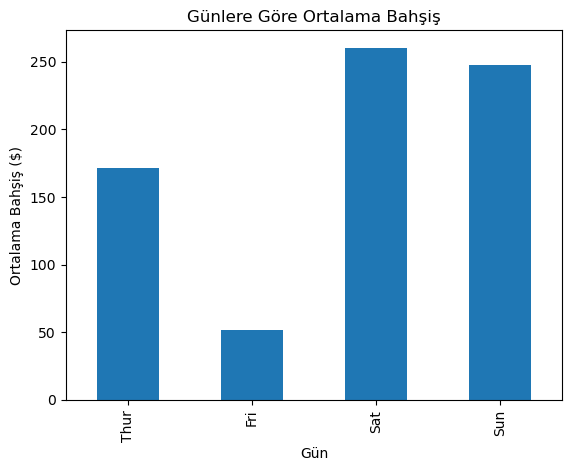

In [209]:
tips.groupby("day")["tip"].sum().plot(kind="bar")
plt.title("Günlere Göre Ortalama Bahşiş")
plt.xlabel("Gün")
plt.ylabel("Ortalama Bahşiş ($)")
plt.show()

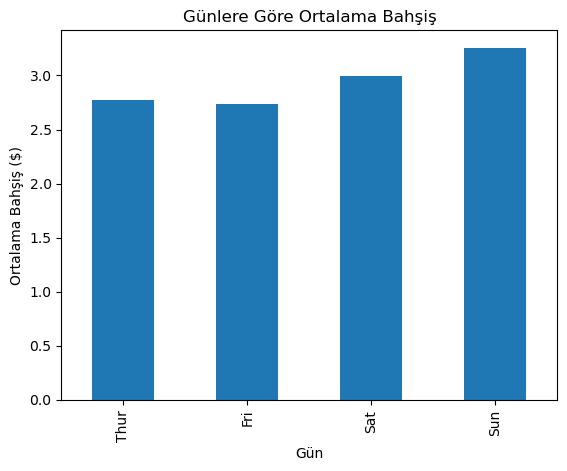

In [211]:
## Bar Graphics

tips.groupby("day")["tip"].mean().plot(kind="bar")
plt.title("Günlere Göre Ortalama Bahşiş")
plt.xlabel("Gün")
plt.ylabel("Ortalama Bahşiş ($)")
plt.show()

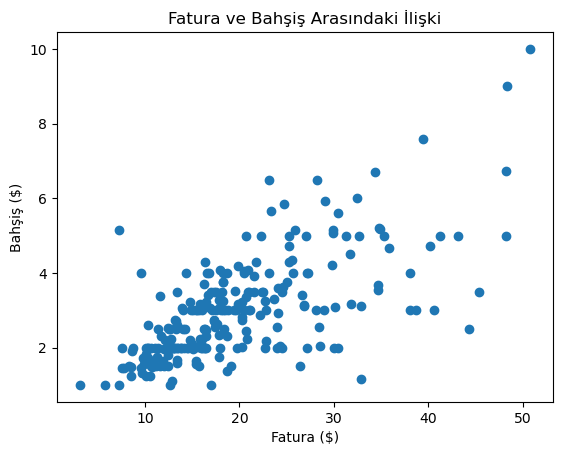

In [213]:
## Scatter

plt.scatter(tips["total_bill"], tips["tip"])
plt.title("Fatura ve Bahşiş Arasındaki İlişki")
plt.xlabel("Fatura ($)")
plt.ylabel("Bahşiş ($)")
plt.show()

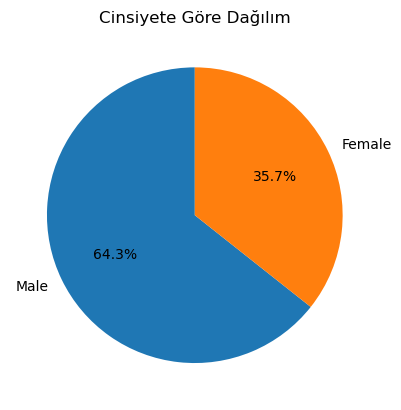

In [215]:
## Pie Chart

tips["sex"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Cinsiyete Göre Dağılım")
plt.ylabel("")  # y ekseni etiketini gizle
plt.show()

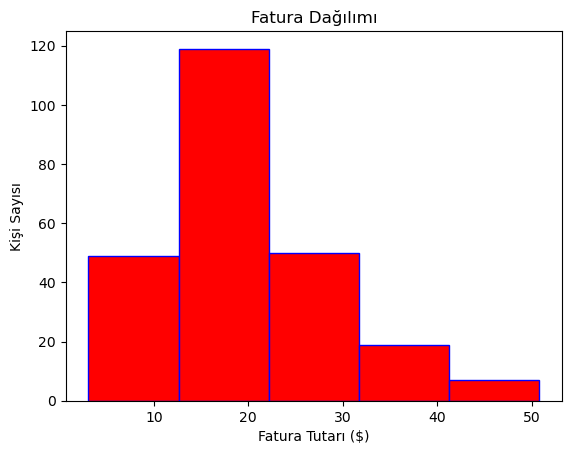

In [217]:
## Histogram

plt.hist(tips["total_bill"], bins=5,color='red', edgecolor='blue')
plt.title("Fatura Dağılımı")
plt.xlabel("Fatura Tutarı ($)")
plt.ylabel("Kişi Sayısı")
plt.show()